In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
print("--- Conteúdo do data.yaml ---")
!cat /content/drive/MyDrive/dio_projeto_yolo_treinamento/data.yaml

print("\n--- Contagem de imagens de treino ---")
!ls -1 /content/drive/MyDrive/dio_projeto_yolo_treinamento/images/train/ | wc -l

print("\n--- Contagem de rótulos de treino ---")
!ls -1 /content/drive/MyDrive/dio_projeto_yolo_treinamento/labels/train/ | wc -l

print("\n--- Contagem de imagens de validação ---")
!ls -1 /content/drive/MyDrive/dio_projeto_yolo_treinamento/images/val/ | wc -l

print("\n--- Contagem de rótulos de validação ---")
!ls -1 /content/drive/MyDrive/dio_projeto_yolo_treinamento/labels/val/ | wc -l

--- Conteúdo do data.yaml ---
﻿# Caminhos para as pastas de treino e validação no Google Colab
# (O Colab acessa seu Drive como /content/drive/MyDrive/)
train: /content/drive/MyDrive/dio_projeto_yolo_treinamento/images/train
val: /content/drive/MyDrive/dio_projeto_yolo_treinamento/images/val


# Número de classes
nc: 2


# Nomes das classes (na MESMA ORDEM do seu arquivo classes.txt)
# "Caneca" é ID 0, "Tesoura" é ID 1
names: ['Caneca', 'Tesoura']
--- Contagem de imagens de treino ---
48

--- Contagem de rótulos de treino ---
48

--- Contagem de imagens de validação ---
12

--- Contagem de rótulos de validação ---
12


In [ ]:
import os

image_dir_train = "/content/drive/MyDrive/dio_projeto_yolo_treinamento/images/train/"
label_dir_train = "/content/drive/MyDrive/dio_projeto_yolo_treinamento/labels/train/"

# Pega todos os nomes base dos arquivos de imagem (sem extensão)
image_files_train = {os.path.splitext(f)[0] for f in os.listdir(image_dir_train) if os.path.isfile(os.path.join(image_dir_train, f))}

# Pega todos os nomes base dos arquivos de rótulo (sem extensão)
label_files_train = {os.path.splitext(f)[0] for f in os.listdir(label_dir_train) if os.path.isfile(os.path.join(label_dir_train, f))}

# Encontra imagens que não têm um arquivo de rótulo correspondente
missing_labels_train = image_files_train - label_files_train

if missing_labels_train:
    print("ERRO: Arquivos de imagem de TREINO SEM rótulos .txt correspondentes:")
    for filename_base in missing_labels_train:
        # Tenta encontrar a extensão original da imagem (pode ser .jpg, .png, etc.)
        original_image_filename = ""
        for ext in ['.jpg', '.jpeg', '.png', '.webp']: # Adicione outras extensões se usou
            if os.path.exists(os.path.join(image_dir_train, filename_base + ext)):
                original_image_filename = filename_base + ext
                break
        print(f"- Imagem: {original_image_filename} (esperava um '{filename_base}.txt' em labels/train/)")
else:
    print("Verificação de TREINO: Todos os arquivos de imagem de treino têm um arquivo de rótulo .txt correspondente. OK!")

# Verificação opcional para rótulos sem imagens (menos comum de ser o problema aqui)
# extra_labels_train = label_files_train - image_files_train
# if extra_labels_train:
#     print("\nAVISO: Arquivos de rótulo de TREINO SEM imagens .jpg/.png correspondentes:")
#     for filename_base in extra_labels_train:
#         print(f"- Rótulo: {filename_base}.txt")

ERRO: Arquivos de imagem de TREINO SEM rótulos .txt correspondentes:
- Imagem: tesoura7.jpeg (esperava um 'tesoura7.txt' em labels/train/)
- Imagem: tesoura24.jpg (esperava um 'tesoura24.txt' em labels/train/)
- Imagem: tesoura16.jpg (esperava um 'tesoura16.txt' em labels/train/)
- Imagem: caneca19.jpeg (esperava um 'caneca19.txt' em labels/train/)
- Imagem: caneca21.jpeg (esperava um 'caneca21.txt' em labels/train/)
- Imagem: tesoura23.jpg (esperava um 'tesoura23.txt' em labels/train/)
- Imagem: caneca22.jpeg (esperava um 'caneca22.txt' em labels/train/)
- Imagem: tesoura2.jpg (esperava um 'tesoura2.txt' em labels/train/)
- Imagem: caneca2.jpg (esperava um 'caneca2.txt' em labels/train/)
- Imagem: caneca9.jpeg (esperava um 'caneca9.txt' em labels/train/)
- Imagem: tesoura6.jpeg (esperava um 'tesoura6.txt' em labels/train/)
- Imagem: caneca18.jpeg (esperava um 'caneca18.txt' em labels/train/)
- Imagem: tesoura20.jpg (esperava um 'tesoura20.txt' em labels/train/)
- Imagem: tesoura4.jpg 

In [ ]:
from ultralytics import YOLO
import os

print("Starting YOLO training script...")
model = YOLO('yolov8n.pt') # Usando o modelo nano para começar
data_yaml_path = '/content/drive/MyDrive/dio_projeto_yolo_treinamento/data.yaml'
base_results_dir = '/content/drive/MyDrive/dio_projeto_yolo_treinamento/training_results'
# Use um nome de experimento novo ou que indique que os dados foram corrigidos
experiment_name = 'treino_final_dados_completos_v1' # Pode manter ou alterar

print(f"Using data_yaml: {data_yaml_path}")
print(f"Results will be saved to: {base_results_dir}/{experiment_name}")

results = model.train(
    data=data_yaml_path,
    epochs=50,       # 50 épocas é um bom começo
    imgsz=640,       # Tamanho da imagem para treinamento
    batch=8,         # Ajuste se tiver erro de memória CUDA (pode tentar 4 ou 16)
    project=base_results_dir,
    name=experiment_name
)

print("Treinamento concluído!")
print(f"Os resultados do treinamento, incluindo os pesos do modelo (best.pt), foram salvos em:")
print(f"{base_results_dir}/{experiment_name}/weights/")

Starting YOLO training script...
Using data_yaml: /content/drive/MyDrive/dio_projeto_yolo_treinamento/data.yaml
Results will be saved to: /content/drive/MyDrive/dio_projeto_yolo_treinamento/training_results/treino_final_dados_completos_v1
Ultralytics 8.3.133 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/dio_projeto_yolo_treinamento/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, ma

train: Scanning /content/drive/MyDrive/dio_projeto_yolo_treinamento/labels/train.cache... 0 images, 48 backgrounds, 0 corrupt: 100%|██████████| 48/48 [00:00<?, ?it/s]

WARNING ⚠️ Labels are missing or empty in /content/drive/MyDrive/dio_projeto_yolo_treinamento/labels/train.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.6±0.4 ms, read: 7.6±5.8 MB/s, size: 34.9 KB)


val: Scanning /content/drive/MyDrive/dio_projeto_yolo_treinamento/labels/val.cache... 0 images, 12 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]

WARNING ⚠️ Labels are missing or empty in /content/drive/MyDrive/dio_projeto_yolo_treinamento/labels/val.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


Plotting labels to /content/drive/MyDrive/dio_projeto_yolo_treinamento/training_results/treino_final_dados_completos_v12/labels.jpg... 
WARNING ⚠️ zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/dio_projeto_yolo_treinamento/training_results/treino_final_dados_completos_v12
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       1.4G          0      63.46          0          0        640: 100%|██████████| 6/6 [00:01<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.46it/s]


                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       1.5G          0      62.65          0          0        640: 100%|██████████| 6/6 [00:01<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       1.5G          0      60.52          0          0        640: 100%|██████████| 6/6 [00:00<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       1.5G          0      57.29          0          0        640: 100%|██████████| 6/6 [00:00<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.58it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       1.5G          0      54.19          0          0        640: 100%|██████████| 6/6 [00:01<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]

                   all         12          0          0          0          0          0



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       1.5G          0      51.42          0          0        640: 100%|██████████| 6/6 [00:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       1.5G          0      50.25          0          0        640: 100%|██████████| 6/6 [00:00<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.38it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       1.5G          0      49.38          0          0        640: 100%|██████████| 6/6 [00:00<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       1.5G          0      48.19          0          0        640: 100%|██████████| 6/6 [00:00<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       1.5G          0      46.71          0          0        640: 100%|██████████| 6/6 [00:00<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.96it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       1.5G          0      45.82          0          0        640: 100%|██████████| 6/6 [00:00<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.40it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       1.5G          0      44.95          0          0        640: 100%|██████████| 6/6 [00:00<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.38it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       1.5G          0      44.19          0          0        640: 100%|██████████| 6/6 [00:01<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       1.5G          0      46.06          0          0        640: 100%|██████████| 6/6 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       1.5G          0      47.67          0          0        640: 100%|██████████| 6/6 [00:01<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       1.5G          0      44.08          0          0        640: 100%|██████████| 6/6 [00:01<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       1.5G          0      43.08          0          0        640: 100%|██████████| 6/6 [00:00<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.59it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       1.5G          0      42.72          0          0        640: 100%|██████████| 6/6 [00:00<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.07it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       1.5G          0      42.16          0          0        640: 100%|██████████| 6/6 [00:00<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.17it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       1.5G          0      41.43          0          0        640: 100%|██████████| 6/6 [00:00<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.40it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       1.5G          0      40.93          0          0        640: 100%|██████████| 6/6 [00:00<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.50it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       1.5G          0       40.5          0          0        640: 100%|██████████| 6/6 [00:00<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.22it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       1.5G          0      39.95          0          0        640: 100%|██████████| 6/6 [00:00<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.63it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       1.5G          0      39.58          0          0        640: 100%|██████████| 6/6 [00:01<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       1.5G          0      39.38          0          0        640: 100%|██████████| 6/6 [00:01<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       1.5G          0      38.88          0          0        640: 100%|██████████| 6/6 [00:00<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.36it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       1.5G          0      38.42          0          0        640: 100%|██████████| 6/6 [00:00<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.23it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       1.5G          0      38.07          0          0        640: 100%|██████████| 6/6 [00:00<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.19it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       1.5G          0      37.91          0          0        640: 100%|██████████| 6/6 [00:00<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.62it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       1.5G          0      37.55          0          0        640: 100%|██████████| 6/6 [00:00<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       1.5G          0      37.25          0          0        640: 100%|██████████| 6/6 [00:00<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.53it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       1.5G          0      36.96          0          0        640: 100%|██████████| 6/6 [00:00<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.77it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       1.5G          0       36.8          0          0        640: 100%|██████████| 6/6 [00:00<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.54it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       1.5G          0      36.47          0          0        640: 100%|██████████| 6/6 [00:01<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]

                   all         12          0          0          0          0          0



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       1.5G          0      36.22          0          0        640: 100%|██████████| 6/6 [00:01<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       1.5G          0      35.96          0          0        640: 100%|██████████| 6/6 [00:00<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.05it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       1.5G          0      35.83          0          0        640: 100%|██████████| 6/6 [00:00<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.78it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       1.5G          0       35.6          0          0        640: 100%|██████████| 6/6 [00:00<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       1.5G          0      35.37          0          0        640: 100%|██████████| 6/6 [00:00<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.84it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       1.5G          0      35.22          0          0        640: 100%|██████████| 6/6 [00:00<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.17it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       1.5G          0       35.2          0          0        640: 100%|██████████| 6/6 [00:01<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       1.5G          0      35.07          0          0        640: 100%|██████████| 6/6 [00:01<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.23it/s]

                   all         12          0          0          0          0          0



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       1.5G          0      34.94          0          0        640: 100%|██████████| 6/6 [00:01<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       1.5G          0      34.84          0          0        640: 100%|██████████| 6/6 [00:00<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.17it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       1.5G          0      34.73          0          0        640: 100%|██████████| 6/6 [00:00<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.03it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       1.5G          0      34.72          0          0        640: 100%|██████████| 6/6 [00:00<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.12it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       1.5G          0      34.56          0          0        640: 100%|██████████| 6/6 [00:00<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.18it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       1.5G          0       34.5          0          0        640: 100%|██████████| 6/6 [00:00<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.32it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       1.5G          0      34.47          0          0        640: 100%|██████████| 6/6 [00:00<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.88it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       1.5G          0      34.49          0          0        640: 100%|██████████| 6/6 [00:00<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.49it/s]

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



50 epochs completed in 0.022 hours.
Optimizer stripped from /content/drive/MyDrive/dio_projeto_yolo_treinamento/training_results/treino_final_dados_completos_v12/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/dio_projeto_yolo_treinamento/training_results/treino_final_dados_completos_v12/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/dio_projeto_yolo_treinamento/training_results/treino_final_dados_completos_v12/weights/best.pt...
Ultralytics 8.3.133 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.77it/s]
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:493: RuntimeWarning: Mean of empty slice.
  ax.plot(px, py.mean(1), linewidth=3, color="blue", label=f"all classes {ap[:, 0].mean():.3f} mAP@0.5")
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:530: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.1)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:530: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.1)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_met

                   all         12          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:659: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index


Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to /content/drive/MyDrive/dio_projeto_yolo_treinamento/training_results/treino_final_dados_completos_v12
Treinamento concluído!
Os resultados do treinamento, incluindo os pesos do modelo (best.pt), foram salvos em:
/content/drive/MyDrive/dio_projeto_yolo_treinamento/training_results/treino_final_dados_completos_v1/weights/


In [ ]:
import os

print("--- Imagem de treino exemplo ---")
# Lista o primeiro arquivo na pasta de imagens de treino
# Nota: !ls pode não ser confiável se houver muitos arquivos ou nomes complexos. os.listdir é melhor.
image_dir_train = "/content/drive/MyDrive/dio_projeto_yolo_treinamento/images/train/"
label_dir_train = "/content/drive/MyDrive/dio_projeto_yolo_treinamento/labels/train/"

try:
    image_files_in_train_dir = [f for f in os.listdir(image_dir_train) if os.path.isfile(os.path.join(image_dir_train, f))]
    if not image_files_in_train_dir:
        print("Nenhuma imagem encontrada na pasta de treino.")
    else:
        first_image_name_with_ext = image_files_in_train_dir[0]
        first_image_name_base = os.path.splitext(first_image_name_with_ext)[0]

        full_image_path = os.path.join(image_dir_train, first_image_name_with_ext)
        expected_label_file = os.path.join(label_dir_train, first_image_name_base + ".txt")

        print(f"Imagem de exemplo encontrada: {full_image_path}")
        print(f"Procurando por rótulo correspondente: {expected_label_file}")

        if os.path.exists(expected_label_file):
            print(f"Arquivo de rótulo '{expected_label_file}' ENCONTRADO.")
            print(f"\n--- Conteúdo de {expected_label_file} ---")
            # Usar with open para ler o arquivo é mais robusto que !cat para scripts Python
            try:
                with open(expected_label_file, 'r') as f:
                    content = f.read()
                    if content.strip(): # Verifica se não está vazio após remover espaços em branco
                        print(content)
                    else:
                        print("ARQUIVO DE RÓTULO ESTÁ VAZIO OU SÓ CONTÉM ESPAÇOS EM BRANCO.")
            except Exception as e:
                print(f"Erro ao ler o arquivo de rótulo: {e}")
        else:
            print(f"ARQUIVO DE RÓTULO {expected_label_file} NÃO ENCONTRADO!")

except FileNotFoundError:
    print(f"ERRO: A pasta de imagens de treino '{image_dir_train}' não foi encontrada. Verifique o caminho e se o Drive está montado.")
except IndexError:
    print(f"Nenhuma imagem encontrada na pasta '{image_dir_train}' para verificar.")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

--- Imagem de treino exemplo ---
Imagem de exemplo encontrada: /content/drive/MyDrive/dio_projeto_yolo_treinamento/images/train/caneca1.jpg
Procurando por rótulo correspondente: /content/drive/MyDrive/dio_projeto_yolo_treinamento/labels/train/caneca1.txt
ARQUIVO DE RÓTULO /content/drive/MyDrive/dio_projeto_yolo_treinamento/labels/train/caneca1.txt NÃO ENCONTRADO!


In [ ]:
!ls -1 /content/drive/MyDrive/dio_projeto_yolo_treinamento/images/train/ | head -n 1

caneca10.jpeg


In [ ]:
# Exemplo: se a saída acima foi "0a0f9c39-caneca19.jpg", o comando abaixo deve ser:
# !cat "/content/drive/MyDrive/dio_projeto_yolo_treinamento/labels/train/0a0f9c39-caneca19.txt"

# Para fazer isso automaticamente:
import os
image_dir_train = "/content/drive/MyDrive/dio_projeto_yolo_treinamento/images/train/"
label_dir_train = "/content/drive/MyDrive/dio_projeto_yolo_treinamento/labels/train/"
try:
    image_files_in_train_dir = [f for f in os.listdir(image_dir_train) if os.path.isfile(os.path.join(image_dir_train, f))]
    if image_files_in_train_dir:
        first_image_name_with_ext = image_files_in_train_dir[0]
        first_image_name_base = os.path.splitext(first_image_name_with_ext)[0]

        expected_label_file = os.path.join(label_dir_train, first_image_name_base + ".txt")

        print(f"Primeira imagem encontrada: {first_image_name_with_ext}")
        print(f"Procurando por rótulo: {expected_label_file}")

        if os.path.exists(expected_label_file):
            print(f"\n--- Conteúdo de {expected_label_file} ---")
            with open(expected_label_file, 'r') as f:
                content = f.read()
                if content.strip():
                    print(content)
                else:
                    print("ARQUIVO DE RÓTULO ESTÁ VAZIO.")
        else:
            print(f"ARQUIVO DE RÓTULO {expected_label_file} NÃO ENCONTRADO!")
    else:
        print(f"Nenhuma imagem encontrada em {image_dir_train}")

except FileNotFoundError:
    print(f"ERRO: A pasta '{image_dir_train}' ou '{label_dir_train}' não foi encontrada.")
except Exception as e:
    print(f"Ocorreu um erro: {e}")

Primeira imagem encontrada: caneca1.jpg
Procurando por rótulo: /content/drive/MyDrive/dio_projeto_yolo_treinamento/labels/train/caneca1.txt
ARQUIVO DE RÓTULO /content/drive/MyDrive/dio_projeto_yolo_treinamento/labels/train/caneca1.txt NÃO ENCONTRADO!


In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import os
image_dir_train = "/content/drive/MyDrive/dio_projeto_yolo_treinamento/images/train/"
label_dir_train = "/content/drive/MyDrive/dio_projeto_yolo_treinamento/labels/train/"
try:
    image_files_in_train_dir = [f for f in os.listdir(image_dir_train) if os.path.isfile(os.path.join(image_dir_train, f))]
    if image_files_in_train_dir:
        image_files_in_train_dir.sort() # Ordena para consistência do teste
        first_image_name_with_ext = image_files_in_train_dir[0]
        first_image_name_base = os.path.splitext(first_image_name_with_ext)[0]

        expected_label_file = os.path.join(label_dir_train, first_image_name_base + ".txt")

        print(f"Primeira imagem (após ordenação) encontrada em images/train/: {first_image_name_with_ext}")
        print(f"Procurando por rótulo correspondente: {expected_label_file}")

        if os.path.exists(expected_label_file):
            print(f"Arquivo de rótulo '{expected_label_file}' ENCONTRADO.")
            print(f"\n--- Conteúdo de {expected_label_file} ---")
            with open(expected_label_file, 'r') as f:
                content = f.read()
                if content.strip(): # Verifica se não está vazio
                    print(content)
                else:
                    print("ARQUIVO DE RÓTULO ESTÁ VAZIO OU SÓ CONTÉM ESPAÇOS EM BRANCO.")
        else:
            print(f"ERRO: ARQUIVO DE RÓTULO {expected_label_file} NÃO ENCONTRADO!")
    else:
        print(f"Nenhuma imagem encontrada em {image_dir_train}")

except FileNotFoundError:
    print(f"ERRO CRÍTICO: A pasta de imagens '{image_dir_train}' ou de rótulos '{label_dir_train}' não foi encontrada. Verifique os caminhos e se o Drive está montado.")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

Primeira imagem (após ordenação) encontrada em images/train/: caneca1.jpg
Procurando por rótulo correspondente: /content/drive/MyDrive/dio_projeto_yolo_treinamento/labels/train/caneca1.txt
Arquivo de rótulo '/content/drive/MyDrive/dio_projeto_yolo_treinamento/labels/train/caneca1.txt' ENCONTRADO.

--- Conteúdo de /content/drive/MyDrive/dio_projeto_yolo_treinamento/labels/train/caneca1.txt ---
0 0.3820816864295125 0.6258234519104084 0.37154150197628455 0.2951251646903821



In [3]:
print("Installing ultralytics (if needed)...")
!pip install ultralytics
print("ultralytics installation check finished.")

Installing ultralytics (if needed)...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 130.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 101.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia

In [4]:
from ultralytics import YOLO
import os

print("Starting YOLO training script...")
model = YOLO('yolov8n.pt')
data_yaml_path = '/content/drive/MyDrive/dio_projeto_yolo_treinamento/data.yaml'
base_results_dir = '/content/drive/MyDrive/dio_projeto_yolo_treinamento/training_results'
# Use um nome de experimento que reflita o sucesso!
experiment_name = 'TREINO_VITORIOSO_FINAL_v1'

print(f"Using data_yaml: {data_yaml_path}")
print(f"Results will be saved to: {base_results_dir}/{experiment_name}")

results = model.train(
    data=data_yaml_path,
    epochs=50,
    imgsz=640,
    batch=8, # Comece com 8, se der erro de memória CUDA, tente 4
    project=base_results_dir,
    name=experiment_name
)

print("Treinamento concluído!")
print(f"Os resultados do treinamento foram salvos em: {base_results_dir}/{experiment_name}/weights/")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Starting YOLO training script...


100%|██████████| 6.25M/6.25M [00:00<00:00, 378MB/s]

Using data_yaml: /content/drive/MyDrive/dio_projeto_yolo_treinamento/data.yaml
Results will be saved to: /content/drive/MyDrive/dio_projeto_yolo_treinamento/training_results/TREINO_VITORIOSO_FINAL_v1
Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/dio_projeto_yolo_treinamento/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=TREINO_VITORIOSO_FINAL_v1, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=False, project=/

100%|██████████| 755k/755k [00:00<00:00, 84.0MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,238 parameters, 3,011,222 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 325MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.5±0.2 ms, read: 0.1±0.3 MB/s, size: 86.8 KB)


train: Scanning /content/drive/MyDrive/dio_projeto_yolo_treinamento/labels/train... 48 images, 0 backgrounds, 0 corrupt: 100%|██████████| 48/48 [01:22<00:00,  1.71s/it]

train: New cache created: /content/drive/MyDrive/dio_projeto_yolo_treinamento/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 0.1±0.1 MB/s, size: 34.9 KB)


val: Scanning /content/drive/MyDrive/dio_projeto_yolo_treinamento/labels/val... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:16<00:00,  1.35s/it]

val: New cache created: /content/drive/MyDrive/dio_projeto_yolo_treinamento/labels/val.cache


Plotting labels to /content/drive/MyDrive/dio_projeto_yolo_treinamento/training_results/TREINO_VITORIOSO_FINAL_v1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/dio_projeto_yolo_treinamento/training_results/TREINO_VITORIOSO_FINAL_v1
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.03G      2.742      4.334      2.776         15        640: 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all         12         12    0.00185        0.5    0.00703     0.0023

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       2/50      1.17G      2.582       4.12      2.589         18        640: 100%|██████████| 6/6 [00:01<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.76it/s]

                   all         12         12    0.00228      0.667      0.121     0.0165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.18G      2.363      4.175      2.418         15        640: 100%|██████████| 6/6 [00:00<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all         12         12    0.00226      0.667     0.0645     0.0237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       1.2G       2.19       3.83      2.208         14        640: 100%|██████████| 6/6 [00:01<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]

                   all         12         12    0.00252       0.75      0.108     0.0495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       1.2G      2.284       3.93      2.222         17        640: 100%|██████████| 6/6 [00:01<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]


                   all         12         12    0.00258       0.75      0.146     0.0635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.22G      2.063      3.367      2.048         14        640: 100%|██████████| 6/6 [00:00<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.53it/s]

                   all         12         12    0.00228      0.667      0.208     0.0715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.22G       2.13       3.31      2.072         22        640: 100%|██████████| 6/6 [00:00<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.56it/s]

                   all         12         12    0.00182        0.5      0.178     0.0773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.22G      2.153      3.402      2.045         15        640: 100%|██████████| 6/6 [00:00<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all         12         12    0.00217      0.583      0.173     0.0659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.23G      1.858      3.023      1.849         17        640: 100%|██████████| 6/6 [00:00<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]

                   all         12         12    0.00249      0.667      0.231      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.23G      2.189      3.312      2.105         13        640: 100%|██████████| 6/6 [00:00<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]

                   all         12         12    0.00209        0.5      0.285      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.23G      1.889      3.174      1.994         15        640: 100%|██████████| 6/6 [00:00<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.10it/s]

                   all         12         12     0.0023      0.583      0.172     0.0904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.23G      2.062      3.356       2.05         15        640: 100%|██████████| 6/6 [00:00<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.24it/s]

                   all         12         12    0.00202        0.5      0.156     0.0692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.23G      2.079      3.123      1.999         20        640: 100%|██████████| 6/6 [00:01<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         12         12    0.00217      0.583      0.108      0.041



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.23G      1.974      3.125      1.946         14        640: 100%|██████████| 6/6 [00:01<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all         12         12    0.00211      0.583      0.196     0.0617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.23G      2.186      3.397      2.153         15        640: 100%|██████████| 6/6 [00:01<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.32it/s]

                   all         12         12    0.00211      0.583      0.196     0.0617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.23G      2.015       3.06      1.924         21        640: 100%|██████████| 6/6 [00:00<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]

                   all         12         12      0.625      0.225      0.186     0.0542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.23G      2.153      3.148      2.051         18        640: 100%|██████████| 6/6 [00:00<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]

                   all         12         12      0.954      0.167       0.24     0.0597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.23G      2.035      3.239      1.936         16        640: 100%|██████████| 6/6 [00:00<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]

                   all         12         12      0.759      0.167      0.217      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.23G      2.146      3.023      2.033         17        640: 100%|██████████| 6/6 [00:00<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.88it/s]

                   all         12         12      0.759      0.167      0.217      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.23G      2.042      2.977      1.944         16        640: 100%|██████████| 6/6 [00:00<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.42it/s]

                   all         12         12        0.5      0.159      0.206      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.23G       2.02          3      1.912         18        640: 100%|██████████| 6/6 [00:00<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.07it/s]

                   all         12         12      0.975     0.0833      0.151     0.0516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.23G      2.036      2.971      1.954         12        640: 100%|██████████| 6/6 [00:00<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.59it/s]

                   all         12         12      0.656      0.167      0.139     0.0322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.23G      1.771       2.81      1.779         17        640: 100%|██████████| 6/6 [00:00<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all         12         12      0.656      0.167      0.139     0.0322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.25G      1.951      2.754      1.884         16        640: 100%|██████████| 6/6 [00:01<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all         12         12      0.802      0.167       0.16     0.0395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.25G       1.86      2.709      1.871         13        640: 100%|██████████| 6/6 [00:01<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.17it/s]

                   all         12         12      0.979      0.167      0.229     0.0561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.25G      1.912      2.638      1.852         19        640: 100%|██████████| 6/6 [00:00<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.19it/s]

                   all         12         12      0.581      0.333      0.111     0.0305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.25G       1.91      2.578      1.859         14        640: 100%|██████████| 6/6 [00:00<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.58it/s]

                   all         12         12      0.581      0.333      0.111     0.0305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.27G      1.906      2.726      1.866         22        640: 100%|██████████| 6/6 [00:00<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.63it/s]

                   all         12         12      0.752       0.25      0.186     0.0438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.27G      1.905      2.836      1.855         21        640: 100%|██████████| 6/6 [00:00<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.07it/s]

                   all         12         12      0.768       0.25      0.194     0.0383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.27G      1.808      2.776      1.833         15        640: 100%|██████████| 6/6 [00:00<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.51it/s]

                   all         12         12      0.679      0.167      0.191     0.0348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.27G      1.733      2.507      1.732         16        640: 100%|██████████| 6/6 [00:00<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.55it/s]

                   all         12         12      0.679      0.167      0.191     0.0348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.29G      1.741      2.565      1.834         25        640: 100%|██████████| 6/6 [00:00<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.97it/s]

                   all         12         12      0.166      0.292      0.264     0.0572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       1.3G      1.731      2.317      1.722         14        640: 100%|██████████| 6/6 [00:00<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]

                   all         12         12      0.645      0.417      0.253     0.0608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       1.3G      1.799      2.425      1.781         13        640: 100%|██████████| 6/6 [00:01<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

                   all         12         12          1      0.159      0.258     0.0428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       1.3G      1.641      2.358      1.664         18        640: 100%|██████████| 6/6 [00:01<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]

                   all         12         12          1      0.159      0.258     0.0428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       1.3G      1.647      2.424      1.708         25        640: 100%|██████████| 6/6 [00:00<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.68it/s]

                   all         12         12      0.749       0.25      0.251     0.0419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       1.3G      1.687      2.355      1.694         15        640: 100%|██████████| 6/6 [00:00<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.36it/s]

                   all         12         12      0.693      0.167      0.207     0.0393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       1.3G      1.595      2.196      1.602         19        640: 100%|██████████| 6/6 [00:00<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.77it/s]

                   all         12         12      0.667       0.25      0.203     0.0555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       1.3G       1.62      2.391      1.697         19        640: 100%|██████████| 6/6 [00:00<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all         12         12      0.667       0.25      0.203     0.0555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       1.3G      1.568      2.212      1.602         13        640: 100%|██████████| 6/6 [00:00<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.42it/s]

                   all         12         12      0.224      0.333      0.182     0.0551


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       1.3G      1.646      2.823      1.893          9        640: 100%|██████████| 6/6 [00:01<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]

                   all         12         12      0.231      0.417      0.241     0.0865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       1.3G      1.728      2.893      1.873          8        640: 100%|██████████| 6/6 [00:01<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         12         12      0.342      0.583      0.358      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       1.3G      1.674      2.755      1.868          8        640: 100%|██████████| 6/6 [00:01<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

                   all         12         12      0.342      0.583      0.358      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       1.3G      1.501      2.698      1.742          8        640: 100%|██████████| 6/6 [00:00<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.19it/s]

                   all         12         12      0.388        0.5      0.387      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       1.3G      1.372      2.552      1.606          8        640: 100%|██████████| 6/6 [00:00<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.03it/s]

                   all         12         12      0.434        0.5      0.387      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       1.3G      1.626      2.674      1.782          8        640: 100%|██████████| 6/6 [00:00<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.55it/s]

                   all         12         12      0.428        0.5      0.401      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       1.3G      1.403      2.445      1.607          8        640: 100%|██████████| 6/6 [00:00<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]

                   all         12         12      0.428        0.5      0.401      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       1.3G      1.365      2.569      1.656          8        640: 100%|██████████| 6/6 [00:00<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]

                   all         12         12      0.449        0.5      0.401       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       1.3G      1.361      2.536      1.614          8        640: 100%|██████████| 6/6 [00:00<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]

                   all         12         12      0.455      0.417      0.405      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       1.3G      1.526      2.562      1.764          8        640: 100%|██████████| 6/6 [00:00<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]


                   all         12         12      0.577      0.404       0.41      0.158

50 epochs completed in 0.021 hours.
Optimizer stripped from /content/drive/MyDrive/dio_projeto_yolo_treinamento/training_results/TREINO_VITORIOSO_FINAL_v1/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/dio_projeto_yolo_treinamento/training_results/TREINO_VITORIOSO_FINAL_v1/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/dio_projeto_yolo_treinamento/training_results/TREINO_VITORIOSO_FINAL_v1/weights/best.pt...
Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]


                   all         12         12      0.582      0.405       0.41      0.158
                Caneca          6          6      0.736      0.667       0.73      0.291
               Tesoura          6          6      0.428      0.143     0.0909     0.0259
Speed: 0.2ms preprocess, 3.3ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to /content/drive/MyDrive/dio_projeto_yolo_treinamento/training_results/TREINO_VITORIOSO_FINAL_v1
Treinamento concluído!
Os resultados do treinamento foram salvos em: /content/drive/MyDrive/dio_projeto_yolo_treinamento/training_results/TREINO_VITORIOSO_FINAL_v1/weights/


In [5]:
from ultralytics import YOLO
import os

print("Starting YOLO training script...")
model = YOLO('yolov8n.pt')
data_yaml_path = '/content/drive/MyDrive/dio_projeto_yolo_treinamento/data.yaml'
base_results_dir = '/content/drive/MyDrive/dio_projeto_yolo_treinamento/training_results'
# Use um nome de experimento que reflita o sucesso!
experiment_name = 'TREINO_VITORIOSO_FINAL_v1'

print(f"Using data_yaml: {data_yaml_path}")
print(f"Results will be saved to: {base_results_dir}/{experiment_name}")

results = model.train(
    data=data_yaml_path,
    epochs=50,
    imgsz=640,
    batch=8, # Comece com 8, se der erro de memória CUDA, tente 4
    project=base_results_dir,
    name=experiment_name
)

print("Treinamento concluído!")
print(f"Os resultados do treinamento foram salvos em: {base_results_dir}/{experiment_name}/weights/")

Starting YOLO training script...
Using data_yaml: /content/drive/MyDrive/dio_projeto_yolo_treinamento/data.yaml
Results will be saved to: /content/drive/MyDrive/dio_projeto_yolo_treinamento/training_results/TREINO_VITORIOSO_FINAL_v1
Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/dio_projeto_yolo_treinamento/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_rat

train: Scanning /content/drive/MyDrive/dio_projeto_yolo_treinamento/labels/train.cache... 48 images, 0 backgrounds, 0 corrupt: 100%|██████████| 48/48 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 12.0±13.6 MB/s, size: 34.9 KB)


val: Scanning /content/drive/MyDrive/dio_projeto_yolo_treinamento/labels/val.cache... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/dio_projeto_yolo_treinamento/training_results/TREINO_VITORIOSO_FINAL_v12/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/dio_projeto_yolo_treinamento/training_results/TREINO_VITORIOSO_FINAL_v12
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.14G      2.742      4.334      2.776         15        640: 100%|██████████| 6/6 [00:01<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]


                   all         12         12    0.00185        0.5    0.00703     0.0023

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.24G      2.582       4.12      2.589         18        640: 100%|██████████| 6/6 [00:01<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]

                   all         12         12    0.00228      0.667      0.121     0.0165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.25G      2.363      4.175      2.418         15        640: 100%|██████████| 6/6 [00:00<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]

                   all         12         12    0.00226      0.667     0.0645     0.0237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.25G       2.19       3.83      2.208         14        640: 100%|██████████| 6/6 [00:01<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

                   all         12         12    0.00252       0.75      0.108     0.0495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.25G      2.284       3.93      2.222         17        640: 100%|██████████| 6/6 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all         12         12    0.00258       0.75      0.146     0.0635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.25G      2.063      3.367      2.048         14        640: 100%|██████████| 6/6 [00:01<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.08it/s]

                   all         12         12    0.00228      0.667      0.208     0.0715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.25G       2.13       3.31      2.072         22        640: 100%|██████████| 6/6 [00:00<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.99it/s]

                   all         12         12    0.00182        0.5      0.178     0.0773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.25G      2.153      3.402      2.045         15        640: 100%|██████████| 6/6 [00:01<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]

                   all         12         12    0.00217      0.583      0.173     0.0659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.25G      1.858      3.023      1.849         17        640: 100%|██████████| 6/6 [00:00<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all         12         12    0.00249      0.667      0.231      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.25G      2.189      3.312      2.105         13        640: 100%|██████████| 6/6 [00:00<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.49it/s]

                   all         12         12    0.00209        0.5      0.285      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.25G      1.889      3.174      1.994         15        640: 100%|██████████| 6/6 [00:00<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.50it/s]

                   all         12         12     0.0023      0.583      0.172     0.0904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.25G      2.062      3.356       2.05         15        640: 100%|██████████| 6/6 [00:00<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.60it/s]

                   all         12         12    0.00202        0.5      0.156     0.0692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.25G      2.079      3.123      1.999         20        640: 100%|██████████| 6/6 [00:01<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         12         12    0.00217      0.583      0.108      0.041



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.25G      1.974      3.125      1.946         14        640: 100%|██████████| 6/6 [00:01<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]

                   all         12         12    0.00211      0.583      0.196     0.0617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.25G      2.186      3.397      2.153         15        640: 100%|██████████| 6/6 [00:00<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.62it/s]

                   all         12         12    0.00211      0.583      0.196     0.0617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.25G      2.015       3.06      1.924         21        640: 100%|██████████| 6/6 [00:00<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]

                   all         12         12      0.625      0.225      0.186     0.0542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.27G      2.153      3.148      2.051         18        640: 100%|██████████| 6/6 [00:00<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.55it/s]

                   all         12         12      0.954      0.167       0.24     0.0597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.27G      2.035      3.239      1.936         16        640: 100%|██████████| 6/6 [00:00<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]

                   all         12         12      0.759      0.167      0.217      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.27G      2.146      3.023      2.033         17        640: 100%|██████████| 6/6 [00:00<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.25it/s]

                   all         12         12      0.759      0.167      0.217      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.27G      2.042      2.977      1.944         16        640: 100%|██████████| 6/6 [00:00<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.51it/s]

                   all         12         12        0.5      0.159      0.206      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.29G       2.02          3      1.912         18        640: 100%|██████████| 6/6 [00:00<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]

                   all         12         12      0.975     0.0833      0.151     0.0516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.29G      2.036      2.971      1.954         12        640: 100%|██████████| 6/6 [00:00<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]


                   all         12         12      0.656      0.167      0.139     0.0322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.29G      1.771       2.81      1.779         17        640: 100%|██████████| 6/6 [00:01<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]

                   all         12         12      0.656      0.167      0.139     0.0322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.29G      1.951      2.754      1.884         16        640: 100%|██████████| 6/6 [00:01<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.36it/s]

                   all         12         12      0.802      0.167       0.16     0.0395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.31G       1.86      2.709      1.871         13        640: 100%|██████████| 6/6 [00:00<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.63it/s]

                   all         12         12      0.979      0.167      0.229     0.0561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.32G      1.912      2.638      1.852         19        640: 100%|██████████| 6/6 [00:00<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.43it/s]

                   all         12         12      0.581      0.333      0.111     0.0305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.32G       1.91      2.578      1.859         14        640: 100%|██████████| 6/6 [00:00<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]

                   all         12         12      0.581      0.333      0.111     0.0305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.32G      1.906      2.726      1.866         22        640: 100%|██████████| 6/6 [00:00<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.50it/s]

                   all         12         12      0.752       0.25      0.186     0.0438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.32G      1.905      2.836      1.855         21        640: 100%|██████████| 6/6 [00:00<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.79it/s]

                   all         12         12      0.768       0.25      0.194     0.0383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.32G      1.808      2.776      1.833         15        640: 100%|██████████| 6/6 [00:00<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.06it/s]

                   all         12         12      0.679      0.167      0.191     0.0348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.32G      1.733      2.507      1.732         16        640: 100%|██████████| 6/6 [00:00<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]

                   all         12         12      0.679      0.167      0.191     0.0348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.32G      1.741      2.565      1.834         25        640: 100%|██████████| 6/6 [00:00<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]


                   all         12         12      0.166      0.292      0.264     0.0572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.32G      1.731      2.317      1.722         14        640: 100%|██████████| 6/6 [00:01<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         12         12      0.645      0.417      0.253     0.0608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.32G      1.799      2.425      1.781         13        640: 100%|██████████| 6/6 [00:01<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.85it/s]

                   all         12         12          1      0.159      0.258     0.0428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.32G      1.641      2.358      1.664         18        640: 100%|██████████| 6/6 [00:00<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.78it/s]

                   all         12         12          1      0.159      0.258     0.0428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.32G      1.647      2.424      1.708         25        640: 100%|██████████| 6/6 [00:00<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]

                   all         12         12      0.749       0.25      0.251     0.0419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.32G      1.687      2.355      1.694         15        640: 100%|██████████| 6/6 [00:00<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]

                   all         12         12      0.693      0.167      0.207     0.0393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.32G      1.595      2.196      1.602         19        640: 100%|██████████| 6/6 [00:00<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.80it/s]

                   all         12         12      0.667       0.25      0.203     0.0555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.32G       1.62      2.391      1.697         19        640: 100%|██████████| 6/6 [00:00<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.24it/s]


                   all         12         12      0.667       0.25      0.203     0.0555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.32G      1.568      2.212      1.602         13        640: 100%|██████████| 6/6 [00:00<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.45it/s]

                   all         12         12      0.224      0.333      0.182     0.0551


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.32G      1.646      2.823      1.893          9        640: 100%|██████████| 6/6 [00:01<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]

                   all         12         12      0.231      0.417      0.241     0.0865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.32G      1.728      2.893      1.873          8        640: 100%|██████████| 6/6 [00:01<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]

                   all         12         12      0.342      0.583      0.358      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.32G      1.674      2.755      1.868          8        640: 100%|██████████| 6/6 [00:01<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]

                   all         12         12      0.342      0.583      0.358      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.32G      1.501      2.698      1.742          8        640: 100%|██████████| 6/6 [00:00<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.05it/s]

                   all         12         12      0.388        0.5      0.387      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.32G      1.372      2.552      1.606          8        640: 100%|██████████| 6/6 [00:00<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.98it/s]

                   all         12         12      0.434        0.5      0.387      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.32G      1.626      2.674      1.782          8        640: 100%|██████████| 6/6 [00:00<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.17it/s]

                   all         12         12      0.428        0.5      0.401      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.32G      1.403      2.445      1.607          8        640: 100%|██████████| 6/6 [00:00<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]

                   all         12         12      0.428        0.5      0.401      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.32G      1.365      2.569      1.656          8        640: 100%|██████████| 6/6 [00:00<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.87it/s]

                   all         12         12      0.449        0.5      0.401       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.32G      1.361      2.536      1.614          8        640: 100%|██████████| 6/6 [00:00<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]

                   all         12         12      0.455      0.417      0.405      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.32G      1.526      2.562      1.764          8        640: 100%|██████████| 6/6 [00:00<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.87it/s]

                   all         12         12      0.577      0.404       0.41      0.158



50 epochs completed in 0.021 hours.
Optimizer stripped from /content/drive/MyDrive/dio_projeto_yolo_treinamento/training_results/TREINO_VITORIOSO_FINAL_v12/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/dio_projeto_yolo_treinamento/training_results/TREINO_VITORIOSO_FINAL_v12/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/dio_projeto_yolo_treinamento/training_results/TREINO_VITORIOSO_FINAL_v12/weights/best.pt...
Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]


                   all         12         12      0.582      0.405       0.41      0.158
                Caneca          6          6      0.736      0.667       0.73      0.291
               Tesoura          6          6      0.428      0.143     0.0909     0.0259
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to /content/drive/MyDrive/dio_projeto_yolo_treinamento/training_results/TREINO_VITORIOSO_FINAL_v12
Treinamento concluído!
Os resultados do treinamento foram salvos em: /content/drive/MyDrive/dio_projeto_yolo_treinamento/training_results/TREINO_VITORIOSO_FINAL_v1/weights/


In [6]:
from ultralytics import YOLO
from PIL import Image
import os

# Caminho para os pesos do SEU MELHOR MODELO TREINADO (best.pt)
model_path = '/content/drive/MyDrive/dio_projeto_yolo_treinamento/training_results/TREINO_VITORIOSO_FINAL_v1/weights/best.pt'

# Carregar o modelo treinado
model = YOLO(model_path)

# Caminho para uma imagem de teste OU uma pasta com imagens de teste
# SUBSTITUA PELO CAMINHO DA SUA IMAGEM OU PASTA DE TESTE
# Exemplo para uma imagem:
test_source_path = '/content/drive/MyDrive/dio_projeto_yolo_treinamento/imagens_para_teste_final/minha_imagem_teste1.jpg'
# Exemplo para uma pasta:
# test_source_path = '/content/drive/MyDrive/dio_projeto_yolo_treinamento/imagens_para_teste_final/'


# Pasta para salvar os resultados da detecção no seu Drive
# Ele criará uma subpasta com o nome do 'name' automaticamente
output_dir_predictions = '/content/drive/MyDrive/dio_projeto_yolo_treinamento/prediction_results'
prediction_run_name = 'deteccoes_finais_v1'

print(f"Carregando modelo de: {model_path}")
print(f"Realizando predição em: {test_source_path}")
print(f"Resultados da predição serão salvos em uma subpasta dentro de: {output_dir_predictions}/{prediction_run_name}")

# Fazer predição
# save=True salva a imagem com as detecções
# show=True tenta exibir no Colab (pode não funcionar bem para múltiplas imagens de uma pasta)
# conf=0.25 é o limiar de confiança (pode ajustar)
results = model.predict(source=test_source_path, save=True, project=output_dir_predictions, name=prediction_run_name, conf=0.25)

print("\nPredição concluída!")
print(f"Verifique a pasta '{output_dir_predictions}/{prediction_run_name}/' no seu Google Drive para as imagens com as detecções.")

# Para tentar exibir a primeira imagem processada (se 'source' foi uma única imagem e show=True foi usado ou se save=True)
# O Ultralytics agora retorna uma lista de objetos Results.
# Se você usou save=True, o caminho da imagem salva estará em results[0].save_dir
if results and isinstance(results, list) and len(results) > 0:
    if results[0].save_dir:
        print(f"Diretório com resultados salvos: {results[0].save_dir}")
        # Tenta encontrar e exibir a primeira imagem salva, se houver
        saved_files = os.listdir(results[0].save_dir)
        image_files_saved = [f for f in saved_files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        if image_files_saved:
            try:
                print(f"Exibindo primeira imagem com detecção: {image_files_saved[0]}")
                display(Image.open(os.path.join(results[0].save_dir, image_files_saved[0])))
            except Exception as e:
                print(f"Erro ao tentar exibir a imagem: {e}")
        else:
            print("Nenhuma imagem encontrada no diretório de resultados para exibir.")
    else:
        print("O objeto de resultados não contém 'save_dir'. As imagens podem não ter sido salvas como esperado se 'save=True' não funcionou ou se 'source' era um vídeo/stream sem save_frames.")
elif results: # Se results não for uma lista mas ainda tiver algo (menos comum para predict)
    try:
        print("Tentando results.show() se for um único resultado com plot...")
        results.show() # Método antigo, pode não funcionar com as versões mais recentes da mesma forma
    except:
        print("results.show() não disponível ou falhou.")

Carregando modelo de: /content/drive/MyDrive/dio_projeto_yolo_treinamento/training_results/TREINO_VITORIOSO_FINAL_v1/weights/best.pt
Realizando predição em: /content/drive/MyDrive/dio_projeto_yolo_treinamento/imagens_para_teste_final/minha_imagem_teste1.jpg
Resultados da predição serão salvos em uma subpasta dentro de: /content/drive/MyDrive/dio_projeto_yolo_treinamento/prediction_results/deteccoes_finais_v1



FileNotFoundError: /content/drive/MyDrive/dio_projeto_yolo_treinamento/imagens_para_teste_final/minha_imagem_teste1.jpg does not exist

In [7]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [8]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [9]:
!ls -l /content/drive/MyDrive/dio_projeto_yolo_treinamento/imagens_para_teste_final/

total 9
-rw------- 1 root root 3655 May 14 23:18 minha_imagem_teste1.jpeg
-rw------- 1 root root 4365 May 14 23:19 minha_imagem_teste2.jpeg


In [10]:
test_source_path = '/content/drive/MyDrive/dio_projeto_yolo_treinamento/imagens_para_teste_final/minha_imagem_teste1.jpeg' # Extensão corrigida

In [11]:
test_source_path = '/content/drive/MyDrive/dio_projeto_yolo_treinamento/imagens_para_teste_final/' # Aponta para a pasta

In [12]:
from ultralytics import YOLO
from PIL import Image
import os # Certifique-se de que 'os' e 'glob' (usado implicitamente abaixo) estão disponíveis

# Caminho para os pesos do SEU MELHOR MODELO TREINADO (best.pt)
model_path = '/content/drive/MyDrive/dio_projeto_yolo_treinamento/training_results/TREINO_VITORIOSO_FINAL_v1/weights/best.pt' # Verifique se este nome de treino ainda é o correto

# Carregar o modelo treinado
model = YOLO(model_path)

# Caminho para uma imagem de teste OU uma pasta com imagens de teste
# OPÇÃO B: Processar a pasta inteira
test_source_path = '/content/drive/MyDrive/dio_projeto_yolo_treinamento/imagens_para_teste_final/'

# Pasta para salvar os resultados da detecção no seu Drive
output_dir_predictions = '/content/drive/MyDrive/dio_projeto_yolo_treinamento/prediction_results'
prediction_run_name = 'deteccoes_finais_v2' # Novo nome para esta execução de predição

print(f"Carregando modelo de: {model_path}")
print(f"Realizando predição em: {test_source_path}")
print(f"Resultados da predição serão salvos em uma subpasta dentro de: {output_dir_predictions}/{prediction_run_name}")

# Fazer predição
results = model.predict(source=test_source_path, save=True, project=output_dir_predictions, name=prediction_run_name, conf=0.25)

print("\nPredição concluída!")
print(f"Verifique a pasta '{output_dir_predictions}/{prediction_run_name}/' no seu Google Drive para as imagens com as detecções.")

# Para tentar exibir as imagens processadas
if results and isinstance(results, list) and len(results) > 0:
    # Cada item em 'results' corresponde a uma imagem processada se 'source' era uma pasta
    for i, res_item in enumerate(results):
        if res_item.save_dir:
            print(f"\nResultados para a imagem {i+1} salvos em: {res_item.save_dir}")
            # O nome da imagem original geralmente está em res_item.path
            original_filename = os.path.basename(res_item.path)
            saved_image_path = os.path.join(res_item.save_dir, original_filename)

            if os.path.exists(saved_image_path):
                try:
                    print(f"Exibindo detecção: {saved_image_path}")
                    display(Image.open(saved_image_path)) # display() é do IPython.display
                except NameError: # Se display não estiver definido (ex: rodando fora do Colab/Jupyter)
                    print("Função display() não disponível para mostrar imagem aqui. Verifique a pasta salva.")
                except Exception as e:
                    print(f"Erro ao tentar exibir a imagem {saved_image_path}: {e}")
            else:
                print(f"Imagem com detecção '{saved_image_path}' não encontrada como esperado.")
        else:
            print(f"O objeto de resultado para a imagem {i+1} não contém 'save_dir'.")
else:
    print("Nenhum resultado de predição para exibir ou formato de resultado inesperado.")

Carregando modelo de: /content/drive/MyDrive/dio_projeto_yolo_treinamento/training_results/TREINO_VITORIOSO_FINAL_v1/weights/best.pt
Realizando predição em: /content/drive/MyDrive/dio_projeto_yolo_treinamento/imagens_para_teste_final/
Resultados da predição serão salvos em uma subpasta dentro de: /content/drive/MyDrive/dio_projeto_yolo_treinamento/prediction_results/deteccoes_finais_v2

image 1/2 /content/drive/MyDrive/dio_projeto_yolo_treinamento/imagens_para_teste_final/minha_imagem_teste1.jpeg: 640x640 (no detections), 10.1ms
image 2/2 /content/drive/MyDrive/dio_projeto_yolo_treinamento/imagens_para_teste_final/minha_imagem_teste2.jpeg: 640x640 1 Caneca, 7.5ms
Speed: 3.5ms preprocess, 8.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/MyDrive/dio_projeto_yolo_treinamento/prediction_results/deteccoes_finais_v2

Predição concluída!
Verifique a pasta '/content/drive/MyDrive/dio_projeto_yolo_treinamento/prediction_results/deteccoes_fin


Predição concluída!

--- Resultados para imagem 1 (minha_imagem_teste1.jpeg) ---


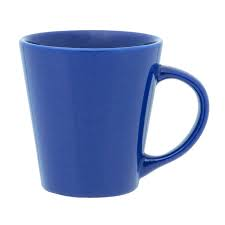

Imagem com detecções salva em: /content/drive/MyDrive/dio_projeto_yolo_treinamento/prediction_results/deteccoes_finais_v2/minha_imagem_teste1.jpeg

--- Resultados para imagem 2 (minha_imagem_teste2.jpeg) ---


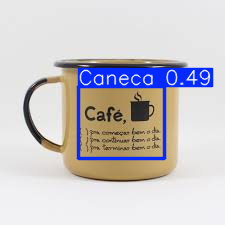

Imagem com detecções salva em: /content/drive/MyDrive/dio_projeto_yolo_treinamento/prediction_results/deteccoes_finais_v2/minha_imagem_teste2.jpeg


In [13]:
from IPython.display import display
from PIL import Image
import numpy as np # Se for usar results.plot()

# ... (código de predição anterior) ...

print("\nPredição concluída!")
# ... (outras mensagens) ...

if results and isinstance(results, list) and len(results) > 0:
    for i, r in enumerate(results):
        print(f"\n--- Resultados para imagem {i+1} ({os.path.basename(r.path)}) ---")
        r.show() # Tenta usar o método .show() do objeto Results, que plota e exibe
        # Ou, para mais controle se .show() não funcionar bem no loop:
        # img_array_with_detections = r.plot() # Retorna um array NumPy (BGR)
        # img_pil = Image.fromarray(img_array_with_detections[:, :, ::-1]) # Converte BGR para RGB para PIL
        # display(img_pil)

        # E para confirmar o local salvo (se save=True foi usado)
        if r.save_dir:
            print(f"Imagem com detecções salva em: {os.path.join(r.save_dir, os.path.basename(r.path))}")
else:
    print("Nenhum resultado de predição para exibir.")